In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import scipy
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lm

In [2]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Exploratory Analysis**

In [4]:
df.shape#There are 14 variables in this datset and 18429 groups of data.

(119390, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Handling the missing values

In [6]:
df.isnull().sum().sum() # missing values, don't care

129425

In [7]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n') #print the missing values

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

We can see "company" column has nearly 94% missing values, it is hard for us to fill the comapny column, since the information is missing too much. We decide to drop the company column or decide not to analyze this column. Also, the "agent" column has 13.68% missing values. This percent is quite large, so we do not decide to drop this column since these missing values may have important information. In particular, there are 333 unique agent, which are too many to be predictable. The NA values can be the agents that are not listed in present 333 agents. Also, we have only 4 missing values in our "children" column, thus we decide to fill NA as 0, which means these agents may not have children.

In [8]:
def null_value(x, y):
    percent = y.isnull().sum() / len(x) * 100
    return percent

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(null_value(df, df['company']),
                                                                          null_value(df, df['agent']),
                                                                          null_value(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


In [9]:
#  copy original dataset
data = df.copy()

In [10]:
data["agent"].value_counts().count()

333

In [11]:
# drop company
data = data.drop(['company'], axis = 1)
#change missing values in children to 0
data['children'] = data['children'].fillna(0)

In [12]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
data['length_of_stays']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

Text(0, 0.5, 'Length of Stays')

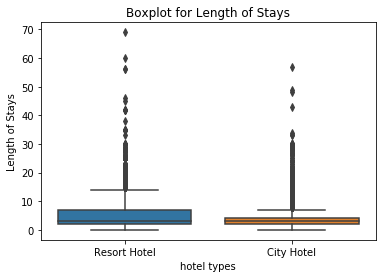

In [14]:
ax = sns.boxplot(x="hotel", y="length_of_stays", data=data)
ax.set_title('Boxplot for Length of Stays')
ax.set_xlabel('hotel types')
ax.set_ylabel('Length of Stays')

In [15]:
dataStatusResort=data[df['hotel']=='Resort Hotel'].groupby('reservation_status').agg('count').reset_index('reservation_status')
dataStatusResort['hotel_name']=pd.Series(['Resort Hotel' for x in range(3)])
dataStatusCity=data[df['hotel']=='City Hotel'].groupby('reservation_status').agg('count').reset_index('reservation_status')
dataStatusCity['hotel_name']=pd.Series(['City Hotel' for x in range(3)])
dfByStatus=pd.concat([dataStatusResort,dataStatusCity], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
dfByStatus

,reservation_status,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,length_of_stays,hotel_name
0,Canceled,10831,10831,10831,10831,10831,10831,10831,10831,10831,...,10831,9484,10831,10831,10831,10831,10831,10831,10831,Resort Hotel
1,Check-Out,28938,28938,28938,28938,28938,28938,28938,28938,28938,...,28938,22150,28938,28938,28938,28938,28938,28938,28938,Resort Hotel
2,No-Show,291,291,291,291,291,291,291,291,291,...,291,217,291,291,291,291,291,291,291,Resort Hotel
0,Canceled,32186,32186,32186,32186,32186,32186,32186,32186,32186,...,32186,29707,32186,32186,32186,32186,32186,32186,32186,City Hotel
1,Check-Out,46228,46228,46228,46228,46228,46228,46228,46228,46228,...,46228,40706,46228,46228,46228,46228,46228,46228,46228,City Hotel
2,No-Show,916,916,916,916,916,916,916,916,916,...,916,786,916,916,916,916,916,916,916,City Hotel


In figure "Reservation Status Distribution", We analyze the reservation status for city and resort hotels. Normally, most people tend to be in check out status, which follows our intuition. Comparing to other two status, there are very few people in no-show status. In general, the number of guests who choose city hotels is larger than the number of guests in resort hotel.

In [16]:
alt.Chart(dfByStatus).mark_bar(opacity=0.7).encode(
    x=alt.X('reservation_status:O', title='Reservation Status'),
    y=alt.Y('hotel:Q', title='Counts'),
    color='hotel_name'
).properties(
    title='Reservation Status Distribution for City and Resort Hotels',
    width=300
)

alt.Chart(...)

In [17]:
data.groupby('deposit_type').agg('count')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stays
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,104641,104641,104641,104641,104641,104641,104641,104641,104641,104641,...,104641,90466,104641,104641,104641,104641,104641,104641,104641,104641
Non Refund,14587,14587,14587,14587,14587,14587,14587,14587,14587,14587,...,14587,12536,14587,14587,14587,14587,14587,14587,14587,14587
Refundable,162,162,162,162,162,162,162,162,162,162,...,162,48,162,162,162,162,162,162,162,162


In [18]:
dataDeposit=data.groupby('deposit_type').agg('sum').reset_index('deposit_type')
dataDeposit

,deposit_type,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,length_of_stays
0,No Deposit,29694,9287581,210974465,2839466,1654861,101519,267546,194904,12389.0,...,3742,4399,16210,26122,8232060.0,158986,10832966.50,7443,68166,369065
1,Non Refund,14494,3105702,29407851,400393,227491,9069,30503,26423,9.0,...,64,6002,155,182,692591.0,116583,1312305.12,1,26,39572
2,Refundable,36,24640,326615,3391,3800,158,462,309,5.0,...,4,0,3,96,9102.0,1553,12345.98,20,23,620


In [19]:
#Create Cancellation Rate Column
dataDeposit['cancellation_rate']=[29694/104641, 14494/14587, 36/162]
dataDeposit

,deposit_type,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,length_of_stays,cancellation_rate
0,No Deposit,29694,9287581,210974465,2839466,1654861,101519,267546,194904,12389.0,...,4399,16210,26122,8232060.0,158986,10832966.50,7443,68166,369065,0.283770
1,Non Refund,14494,3105702,29407851,400393,227491,9069,30503,26423,9.0,...,6002,155,182,692591.0,116583,1312305.12,1,26,39572,0.993624
2,Refundable,36,24640,326615,3391,3800,158,462,309,5.0,...,0,3,96,9102.0,1553,12345.98,20,23,620,0.222222


In [21]:
#Use dataDeposit Dataframe to plot the histogram "Cancellation Rate for Different Deposit Types"
alt.Chart(dataDeposit).mark_bar(opacity=0.7).encode(
    x=alt.X('deposit_type:O', title='Deposit Type'),
    y=alt.Y('cancellation_rate:Q', title='Cancellation Rate')
).properties(
    title='Cancellation Rate for Different Deposit Types',
    width=300
)

alt.Chart(...)

In [22]:
df_deposit_cancel = df.groupby('deposit_type').agg({'is_canceled':sum}).reset_index()
deposit_reservation = df.groupby('deposit_type').size().tolist()
df_deposit_cancel['total_reservations'] = deposit_reservation
df_deposit_cancel['cancellation_rate'] = df_deposit_cancel['is_canceled']/df_deposit_cancel['total_reservations']
df_deposit_cancel

,deposit_type,is_canceled,total_reservations,cancellation_rate
0,No Deposit,29694,104641,0.283770
1,Non Refund,14494,14587,0.993624
2,Refundable,36,162,0.222222


In [24]:
#Plot the histogram of "Cancellation Rate by Deposit Type"
alt.Chart(df_deposit_cancel).mark_bar(size=30).encode(
    x=alt.X('deposit_type:O',title = 'Deposit Type'),
    y=alt.Y('cancellation_rate:Q'),
    color = 'deposit_type'
).properties(
    title ="The Cancellation Rate by Deposit Type",
    width = 250
).configure_title(fontSize = 20).configure_axis(
    labelFontSize = 12,
    titleFontSize = 18
)

alt.Chart(...)

## EDA: Principle Component Analysis

In [25]:
#Dropping unused columns 'agent' and 'company'
df.drop(['agent','company'],axis = 1,inplace = True)
pca_features = df.loc[:,df._get_numeric_data().columns]
# Convert categorial variables into string type and date column into datetime type
df[['hotel','market_segment','reservation_status','deposit_type','distribution_channel','arrival_date_month','country']].astype(str)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.columns[df.isna().any()].tolist()

['children', 'country']

In [26]:
pca_features = df.loc[:,df._get_numeric_data().columns]
pca_features =pca_features.fillna(0)  #fill missing values
n = pca_features.shape[0]
features_mean = np.mean(pca_features,axis= 0)
normalized_features = (pca_features - features_mean)/(n**(1/2))
normalized_features

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,-0.001072,0.688767,-0.003347,-0.000478,-0.042828,-0.002685,-0.007236,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,0.008042,-0.006718,-0.294711,-0.000181,-0.001654
1,-0.001072,1.831943,-0.003347,-0.000478,-0.042828,-0.002685,-0.007236,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,0.010937,-0.006718,-0.294711,-0.000181,-0.001654
2,-0.001072,-0.280762,-0.003347,-0.000478,-0.042828,-0.002685,-0.004342,-0.002479,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,-0.077652,-0.000181,-0.001654
3,-0.001072,-0.263398,-0.003347,-0.000478,-0.042828,-0.002685,-0.004342,-0.002479,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,-0.077652,-0.000181,-0.001654
4,-0.001072,-0.260504,-0.003347,-0.000478,-0.042828,-0.002685,-0.001448,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,-0.011088,-0.000181,0.001241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.001072,-0.234456,0.002441,0.022675,0.041102,0.003104,0.007234,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,-0.016471,-0.000181,-0.001654
119386,-0.001072,-0.005821,0.002441,0.022675,0.043996,0.003104,0.007234,0.003310,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,0.357710,-0.000181,0.004135
119387,-0.001072,-0.202621,0.002441,0.022675,0.043996,0.003104,0.007234,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,0.161720,-0.000181,0.009923
119388,-0.001072,0.014438,0.002441,0.022675,0.043996,0.003104,0.007234,0.000416,-0.000301,-0.000023,-0.000092,-0.000252,-0.000397,-0.000640,-0.006718,0.007435,-0.000181,-0.001654


In [27]:
[u,s,vt] = np.linalg.svd(normalized_features,full_matrices = False)
u.shape, s, vt.shape

((119390, 18),
 array([1.06981577e+02, 5.04252525e+01, 1.73245993e+01, 1.34674050e+01,
        8.74186577e+00, 1.95582723e+00, 1.49855915e+00, 8.46336557e-01,
        8.30213026e-01, 7.76638603e-01, 6.55641400e-01, 5.57150063e-01,
        5.33627858e-01, 4.32910275e-01, 3.74654906e-01, 2.37637124e-01,
        1.55907446e-01, 9.65454944e-02]),
 (18, 18))

In [28]:
first_two_vt_vectors = vt[0:2]
pca_2d = normalized_features @ first_two_vt_vectors.T
pca_2d[0]

0         0.698931
1         1.840636
2        -0.277654
3        -0.260311
4        -0.259961
            ...   
119385   -0.233319
119386   -0.019305
119387   -0.208354
119388    0.014340
119389    0.286644
Name: 0, Length: 119390, dtype: float64

In [29]:
total_variance_computed_from_singular_values = sum(s**2)/len(pca_features)
source = pd.DataFrame({
    'x': np.arange(1,len(s)+1),
    'y': s*s/len(pca_features)/total_variance_computed_from_singular_values
})

alt.Chart(source).mark_bar(size=20).encode(
   x = alt.X('x',title = 'Principle Components'),
   y = alt.Y('y',title ='Amount of Variance Explained'),
).properties(width =400, title = 'Scree Plot Showing the Weight of Each Principle Component')

alt.Chart(...)

## 1. Analyze the Demand and Price of Both Hotels

In [30]:
from sklearn.decomposition import PCA

In [31]:
dfByMonthResort=df[df['hotel']=='Resort Hotel'].groupby('arrival_date_month').agg('count').reset_index('arrival_date_month')
dfByMonthResort=dfByMonthResort.replace(['January','February','March','April','May','June','July','August','September','October','November','December'],
                       np.arange(1,13)).sort_values('arrival_date_month') 
dfByMonthCity=df[df['hotel']=='City Hotel'].groupby('arrival_date_month').agg('count').reset_index('arrival_date_month')
dfByMonthCity=dfByMonthCity.replace(['January','February','March','April','May','June','July','August','September','October','November','December'],
                       np.arange(1,13)).sort_values('arrival_date_month')
dfByMonthCity['Type']= pd.Series(['City Hotel' for x in range(12)])
dfByMonthResort['Type']= pd.Series(['Resort Hotel' for x in range(12)])

In [32]:
dfByMonthDemand=pd.concat([dfByMonthResort,dfByMonthCity], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [33]:
alt.Chart(dfByMonthDemand).mark_line().encode(
    x=alt.X('arrival_date_month', title='Months'),
    y=alt.Y('hotel', title='Demand of Rooms (number of reserved rooms)'),
    color='Type'
).properties(
    title='The Demand of Rooms Among Months Seperated by City Hotel & Resort Hotel'
)

alt.Chart(...)

In general, the demand for city hotel is greater than the demad for resort hotel. Over 12 months, visitors tend to book more rooms of city hotel than of resort hotel in Portugal. Also, the highest demand for city hotel is at August. On the other hand, the highest demand for resort hotel is also at August. This shows that August is the most popular month for visitors to visit Portugal. Besides August, from April to June are also higher demand months for city hotels. Comparing to these months, December and January are the least popular months, since the demand for both two hotels during these two months are very low. In general, the demand for both hotels are low during winter and high during August. People would like to visit Portugal during summer and are not interested in visiting during winter. Interestingly, from August to September, the demand for both hotels decreases immediately, this may be because the summer vacation ends and the fall begins. Fall may not be a fun time in Portugal to attract visitors. 

In [34]:
dfByMonthResort=df[df['hotel']=='Resort Hotel'].groupby('arrival_date_month').agg('mean').reset_index('arrival_date_month')
dfByMonthResort=dfByMonthResort.replace(['January','February','March','April','May','June','July','August','September','October','November','December'],
                       np.arange(1,13)).sort_values('arrival_date_month') 
dfByMonthCity=df[df['hotel']=='City Hotel'].groupby('arrival_date_month').agg('mean').reset_index('arrival_date_month')
dfByMonthCity=dfByMonthCity.replace(['January','February','March','April','May','June','July','August','September','October','November','December'],
                       np.arange(1,13)).sort_values('arrival_date_month')
dfByMonthCity['Type']= pd.Series(['City Hotel' for x in range(12)])
dfByMonthResort['Type']= pd.Series(['Resort Hotel' for x in range(12)])
dfByMonthPrice=pd.concat([dfByMonthResort,dfByMonthCity], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [35]:
alt.Chart(dfByMonthPrice).mark_line().encode(
    x=alt.X('arrival_date_month', title='Months'),
    y=alt.Y('adr', title='Average Price of Rooms'),
    color='Type'
).properties(
    title='The Average Revenue per Romm Among Months Seperated by City Hotel & Resort Hotel'
)

alt.Chart(...)

In general, the price of city hotel changes among months very smoothly, but the price of resort hotel changes very dramatic. Especially for the month August, the price reaches peak 190$\euro$ per night. Also this month is the highest demand month for both hotels. Interestingly, whatever the demand for city hotel changes over 12 months, the average price of city hotel does not change too much. The price of city hotel does not exceed 120$\euro$ and is not less than 80$\euro$. This indicates that city hotel's price change may not depend too much on the popularity of months. Instead, resort hotel located in some scenic spots of Portugal raises price very higher during some popular months such as July and August.

 ### Part 2: Analysis of Cancellation Rates 

In [37]:
#Use groupby to create a dataframe that contains monthly cancellation rates
cancellations = df.groupby('arrival_date_month').agg({'is_canceled':sum}).reset_index()
reservations = df.groupby('arrival_date_month').size()
cancellations_by_hotel = df.groupby(['arrival_date_month','hotel']).agg({'is_canceled':sum}).reset_index()
reservations = df.groupby(['arrival_date_month','hotel']).size().tolist()
cancellations_by_hotel['total_reservations'] = reservations
cancellations_by_hotel['cancellation_rate'] = cancellations_by_hotel['is_canceled']/cancellations_by_hotel['total_reservations']
#cancellations_by_hotel.melt(['hotel','arrival_date_month','is_canceled','cancellation_rate'])

# Assort by months
sorter = ['January','February','March','April','May','June','July','August','September','October','November','December']

cancellations_by_hotel.arrival_date_month = cancellations_by_hotel.arrival_date_month.astype("category")
cancellations_by_hotel.arrival_date_month.cat.set_categories(sorter, inplace=True)


In [38]:
alt.Chart(cancellations_by_hotel).mark_bar().encode(
    x=alt.X('hotel', axis=alt.Axis(title=None, labels=False, ticks=False)),
    y=alt.Y('cancellation_rate', axis=alt.Axis(grid=True,title = 'Cancellation Rate')),
    color='hotel',
    column=alt.Column('arrival_date_month', sort = ['January','February','March','April','May','June','July','August','September','October','November','December'], header=alt.Header(title=None, labelOrient='bottom'))
).configure_view(
    stroke='transparent'
).properties(
    title ="Monthly Cancellation Rates for City Hotel and Resort Hotel",
    width = 30
).configure_title(fontSize = 24).configure_axis(
    labelFontSize = 14,
    titleFontSize = 20
)

alt.Chart(...)

In [39]:
lead_cancel_data = df.groupby(["lead_time",'hotel'])["is_canceled"].describe()
# use only lead_times wih more than 70 bookings for graph to reduce the impacts of outliers:
lead_cancel_data_70 = lead_cancel_data.loc[lead_cancel_data["count"] >= 70].reset_index()

In [40]:
#Analyze the relationship between the lead time and cancellation rates
chart = alt.Chart(lead_cancel_data_70).mark_circle(size=14).encode(
    x = alt.X('lead_time', title='Lead Time/days'),
    y = alt.Y('mean', title='Cancellation Rate',axis=alt.Axis(format='%')),
    color = 'hotel:N'
)

#Plot the scatter points and regression lines for both hotels
Chart =chart +chart.transform_regression('lead_time', 'mean',groupby = ['hotel']).mark_line()
Chart.properties(
    title ="The Relationship Between Lead Time and Cancellation Rates By Hotels",
    width = 470,
    height = 290
).configure_title(fontSize = 20).configure_axis(
    labelFontSize = 14,
    titleFontSize = 20
)

alt.LayerChart(...)

## Part 3: Patterns of Consumer Behaviors

In [41]:
# Calculate the cancellations by market segments
total_cancel = len(df[df['is_canceled'] ==1])
segment_cancel = df.groupby('market_segment').agg({'is_canceled':sum})
segment_cancel['cancel_rate'] = segment_cancel['is_canceled']/total_cancel
segment_cancel.reset_index(inplace = True)
segment_cancel.drop(df.index[[0,1,7]],inplace= True)

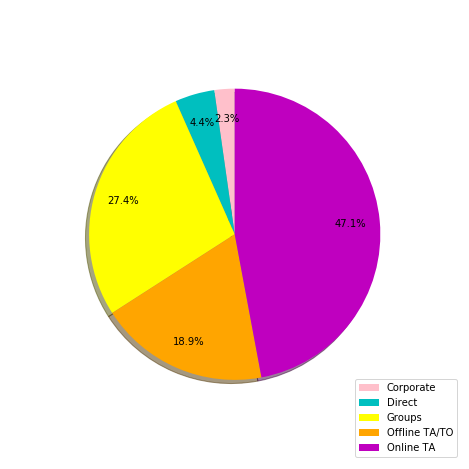

In [42]:
slices = segment_cancel['is_canceled']
segment = segment_cancel['market_segment']
cols = ['pink','c','yellow','orange','m']

# Create pie charts to view the distribution of cancellations in differnet market segments
plt.pie(slices,
        colors=cols,
        startangle=90,
        shadow= True,
        radius = 0.8,
        autopct='%1.1f%%',
        labeldistance=0.2,
        pctdistance=0.8
)

plt.legend(segment, loc="lower right")
plt.subplots_adjust(left=-1.45, bottom=-0.7, right=4.45)

plt.show()

In [45]:
# The correlation of other variables with revenue
correlation=pd.DataFrame(data.corr()['adr']).reset_index(0)
correlation=correlation.drop(16, axis=0)
correlation

,index,adr
0,is_canceled,0.047557
1,lead_time,-0.063077
2,arrival_date_year,0.197580
3,arrival_date_week_number,0.075791
4,arrival_date_day_of_month,0.030245
5,stays_in_weekend_nights,0.049342
6,stays_in_week_nights,0.065237
7,adults,0.230641
8,children,0.324853
9,babies,0.029186


In [46]:
alt.Chart(correlation).mark_bar().encode(
    x=alt.X('index', title='Variables'),
    y=alt.Y('adr', title='correlation to revenue')
).properties(
    title="Correlations of Each Variable to Revenue "
)

alt.Chart(...)

In [47]:
def select_columns(data, *columns):
    cols = [c for c in columns if c in data.columns]
    return data.loc[:, cols]

def process_data_gm(data):

    # Transform Data, Select Features
    data = select_columns(data,
                          'adr',
                          'arrival_date_year',
                          'adults',
                          'children',
                          'is_repeated_guest',
                          'total_of_special_requests',)
    
    # Return predictors and response variables separately
    if 'adr' in data.columns:
        X = data.drop(['adr'], axis = 1) 
        y = data.loc[:, 'adr']
    else:
    # Return none for y if SalePrice is not known X = data
        y = None
    return X, y

In [48]:
X_train, y_train = process_data_gm(data)

In [49]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression 
linear_model = lm.LinearRegression(fit_intercept=True)

In [56]:
## Fit the linear model
linear_model.fit(X_train, y_train)
## Generate predictions
y_fitted = linear_model.predict(X_train)

## Coefficients in the linear regression model
coefs = linear_model.coef_
print(coefs)

[ 11.78723306  16.46800946  37.78254583 -28.7515882    6.88620213]


In [57]:
#Calculate the Root Mean Squared Error
full_data_len=len(data)
def rmse(actual, predicted):
    total=sum(((actual-predicted)**2)) 
    return (total/full_data_len)**(1/2)
r1=rmse(y_train, y_fitted)
r1

45.05974217178473

In [58]:
len(data)

119390

In [60]:
residual=y_train-y_fitted
data_residual={'residuals': residual, 'Adr': data['adr']}

In [61]:
residuals=residual<1000

In [62]:
residual

0        -83.621213
1        -83.621213
2          7.846797
3          7.846797
4          7.492585
            ...    
119385   -11.055679
119386    87.993907
119387    22.969513
119388    -2.795679
119389    30.231917
Name: adr, Length: 119390, dtype: float64

In [68]:
#Create the multilinear regression
def select_columns(data, *columns):
    cols = [c for c in columns if c in data.columns]
    return data.loc[:, cols]

def process_data_gm(data):

    # Transform Data, Select Features
    data = select_columns(data,
                          'adr',
                          'arrival_date_year',
                          'adults',
                          'children',
                          'is_repeated_guest',
                          'total_of_special_requests',
                          'lead_time',
                          'length_of_stays',
                          'is_canceled')
    
    # Return predictors and response variables separately
    if 'adr' in data.columns:
        X = data.drop(['adr'], axis = 1) 
        y = data.loc[:, 'adr']
    else:
    # Return none for y if SalePrice is not known X = data
        y = None
    return X, y

In [69]:
X_train, y_train = process_data_gm(data)

In [70]:
linear_model = lm.LinearRegression(fit_intercept=True)

In [71]:
## Fit the linear model
linear_model.fit(X_train, y_train)
## Generate predictions
y_fitted = linear_model.predict(X_train)

## Coefficients in the linear regression model
coefs = linear_model.coef_
print(coefs)

[ 11.9258272   16.87833092  36.93021062 -29.92248899   7.30225146
  -0.05280892   0.46307978   8.58839134]


In [72]:
full_data_len=len(data)
def rmse(actual, predicted):
    total=sum(((actual-predicted)**2)) 
    return (total/full_data_len)**(1/2)
r2=rmse(y_train, y_fitted)
r2

44.67569722480852

In [73]:
percentDiminished=((r1-r2)/r1)*100
percentDiminished

0.8523016965167696